In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import vpfits

from scipy.ndimage.filters import gaussian_filter
from scipy.signal import argrelextrema

# Observed Spectrum

Here we test VAMP on a spectrum measured from quasar Q1422+231, at redshift 3.62.

In [2]:
# cont = pd.read_table('q1422.cont', delim_whitespace=True, header=None)
# cont.columns = ['wavelength', 'velocity', 'flux', 'noise']
# cont.head()

In [3]:
cont = np.loadtxt('data/q1422.cont')

In [4]:
vpfit = vpfits.VPfit()
onesigmaerror = 0.02

## Region Detection

We perform region detection on the entire spectrum, dividing it into regions to be fitted.

In [5]:
min_region_width = 2

regions = vpfits.compute_detection_regions(cont[:,0], cont[:,2], cont[:,3], 
                                          min_region_width=min_region_width)

#regions = vpfit.compute_detection_regions(cont['wavelength'], cont['flux'], cont['noise'], 
#                                          buffer=buffer, min_region_width=min_region_width)

Computing detection regions...
Found 421 detection regions.


In [6]:
# region_arrays = []
# region_pixels = []
# for region in regions:
#     start = np.where(cont['wavelength'] == region[0])[0][0]
#     end = np.where(cont['wavelength'] == region[1])[0][0]
#     region_pixels.append([start, end])
#     region_arrays.append([cont['wavelength'][start:end], cont['flux'][start:end]])

In [7]:
region_arrays = []
region_pixels = []
for region in regions:
    start = np.where(cont[:,0] == region[0])[0][0]
    end = np.where(cont[:,0] == region[1])[0][0]
    region_pixels.append([start, end])
    region_arrays.append([cont[:,0][start:end], cont[:,2][start:end], cont[:,3][start:end]])

In [8]:
def plot_bracket(x, axis, dir):
    height = .2
    arm_length = 0.2
    axis.plot((x, x), (1-height/2, 1+height/2), color='magenta')

    if dir=='left':
        xarm = x+arm_length
    if dir=='right':
        xarm = x-arm_length

    axis.plot((x, xarm), (1-height/2, 1-height/2), color='magenta')
    axis.plot((x, xarm), (1+height/2, 1+height/2), color='magenta')
def sigma_limits(array, width=3, sigma_max=3):
    array = np.ma.greater_equal(np.abs(array), 3).data
    array = np.convolve(array, np.ones((width,)), mode='valid')
    if np.max(array) >= 3:
        return True
    return False
    

In [9]:
# N = 6

# fig, ax = plt.subplots(N, figsize=(10,10))

# for n in range(N):
    
#     length = len(cont) / N
    
#     lower_lim = n*length
#     upper_lim = n*length+length
    
#     ax[n].plot(cont['wavelength'], cont['flux'], c='black')
    
#     ax[n].set_xlim(cont['wavelength'][lower_lim], cont['wavelength'][upper_lim])

#     for arr in region_arrays:
#         ax[n].plot(arr[0], arr[1], color='blue')

#     for (start, end) in region_pixels:
#         plot_bracket(cont['wavelength'][start], ax[n], 'left')
#         plot_bracket(cont['wavelength'][end], ax[n], 'right')


# plt.show()

In [10]:
#N = 6
#fig, ax = plt.subplots(N, figsize=(15,15))
#
#for n in range(N):
#    length = len(cont) / N
#    
#    lower_lim = n*length
#    upper_lim = n*length+length
#    
#    ax[n].plot(cont[:,0], cont[:,2], c='black')
#    
#    ax[n].set_xlim(cont[:,0][lower_lim], cont[:,0][upper_lim])
#
#    for arr in region_arrays:
#        ax[n].plot(arr[0], arr[1], color='blue')
#
#    for (start, end) in region_pixels:
#        plot_bracket(cont[:,0][start], ax[n], 'left')
#        plot_bracket(cont[:,0][end], ax[n], 'right')
#
#plt.show()

## Fitting

We fit each region separately, determining the optimal number of profiles to fit with.

Setting initial number of lines to: 1
n:  2
Fit 1 BIC:  -175.837658546 , Fit 2 BIC:  -173.036872636
BIC Ratio:  1.01618606408
n (final):  1
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.6 sec
Took: 0:00:02.644000  to finish.


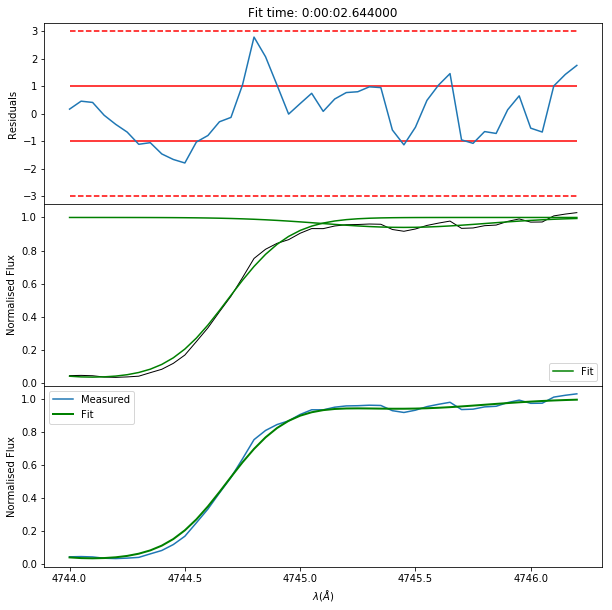

Setting initial number of lines to: 10
n:  11
Fit 1 BIC:  -902.162604808 , Fit 2 BIC:  -1067.89232145
BIC Ratio:  0.844806715701
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 18.6 sec
Took: 0:00:18.556000  to finish.
n (final):  10
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 18.8 sec
Took: 0:00:18.789000  to finish.


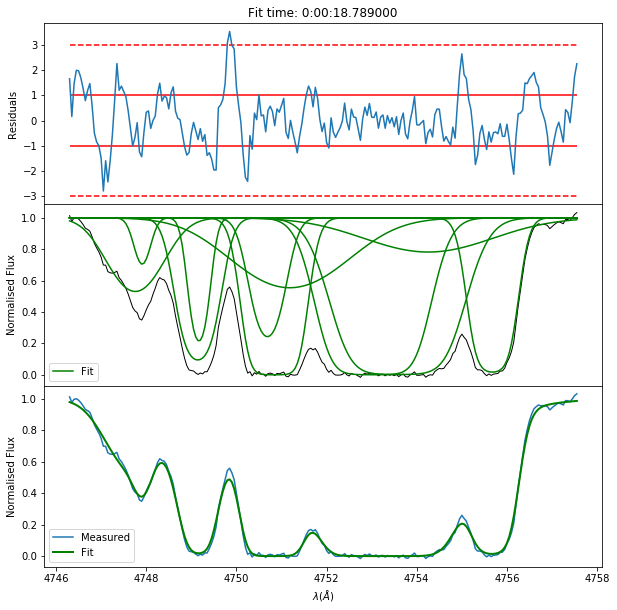

Setting initial number of lines to: 1
n:  2
Fit 1 BIC:  -213.297806586 , Fit 2 BIC:  -284.101808886
BIC Ratio:  0.750779473815
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.4 sec
Took: 0:00:02.430000  to finish.
n (final):  1
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.5 sec
Took: 0:00:02.500000  to finish.


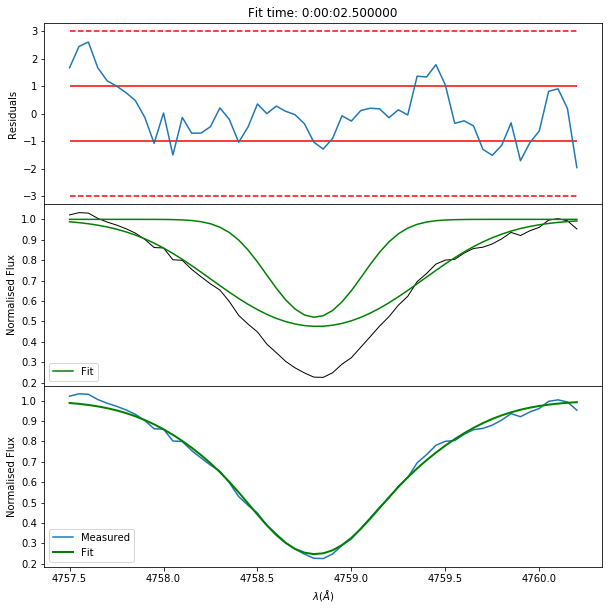

Setting initial number of lines to: 1
n:  2
Fit 1 BIC:  -314.825930828 , Fit 2 BIC:  -430.444792952
BIC Ratio:  0.73139676907
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.4 sec
Took: 0:00:02.398000  to finish.
n (final):  1
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.4 sec
Took: 0:00:02.371000  to finish.


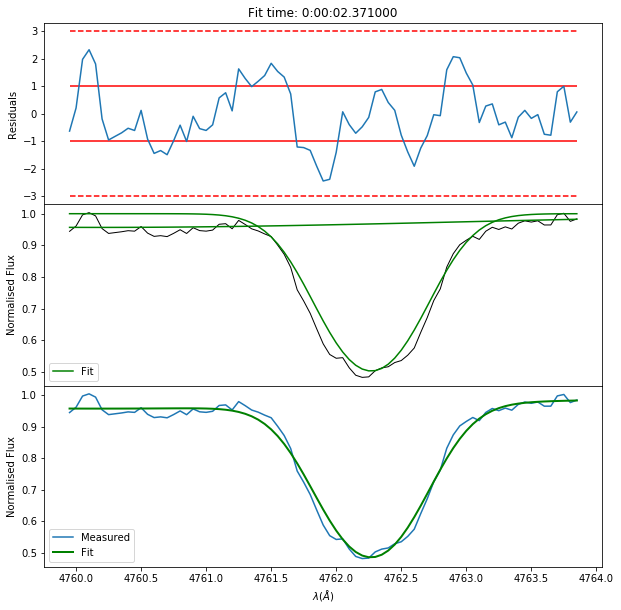

Setting initial number of lines to: 13


vpfits.py:219: RuntimeWarning: divide by zero encountered in log
  return np.log(value * np.exp(-value))
vpfits.py:88: RuntimeWarning: overflow encountered in exp
  return np.exp(-arr)


n:  14
Fit 1 BIC:  -979.307405356 , Fit 2 BIC:  -1258.57820281
BIC Ratio:  0.778106122582
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 26.8 sec
Took: 0:00:26.771000  to finish.
n:  15
Fit 1 BIC:  -1258.57820281 , Fit 2 BIC:  -1732.52448987
BIC Ratio:  0.726441796449
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 31.4 sec
Took: 0:00:31.384000  to finish.
n:  16
Fit 1 BIC:  -1732.52448987 , Fit 2 BIC:  -1222.15113429
BIC Ratio:  1.41760248897
n:  17
Fit 1 BIC:  -1222.15113429 , Fit 2 BIC:  -1437.1120757
BIC Ratio:  0.850421588515
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 37.5 sec
Took: 0:00:37.525000  to finish.
n:  18
Fit 1 BIC:  -1437.1120757 , Fit 

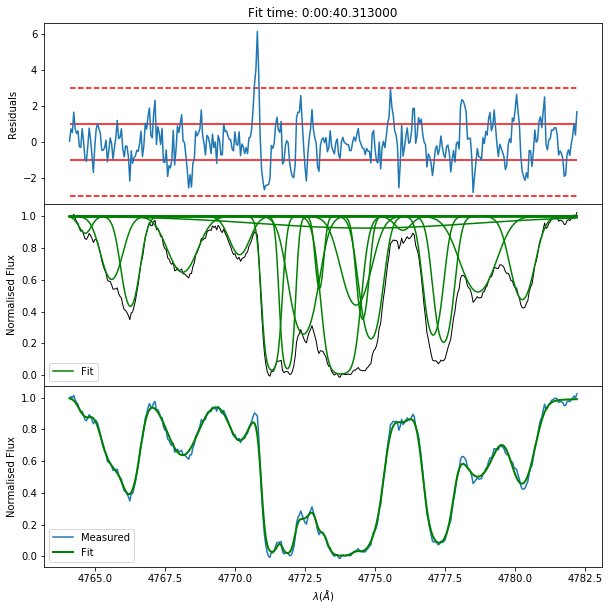

Setting initial number of lines to: 1
n:  2
Fit 1 BIC:  -190.821929391 , Fit 2 BIC:  -429.333244742
BIC Ratio:  0.444461107376
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.9 sec
Took: 0:00:02.930000  to finish.
n:  3
Fit 1 BIC:  -429.333244742 , Fit 2 BIC:  -422.250788909
BIC Ratio:  1.01677310266
n:  4
Fit 1 BIC:  -422.250788909 , Fit 2 BIC:  -445.940265314
BIC Ratio:  0.946877467124
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 5.3 sec
Took: 0:00:05.308000  to finish.
n:  5
Fit 1 BIC:  -445.940265314 , Fit 2 BIC:  -469.303242627
BIC Ratio:  0.950217737296
n (final):  4
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 6.8 sec
Took: 0:00:06.763000  to finish.


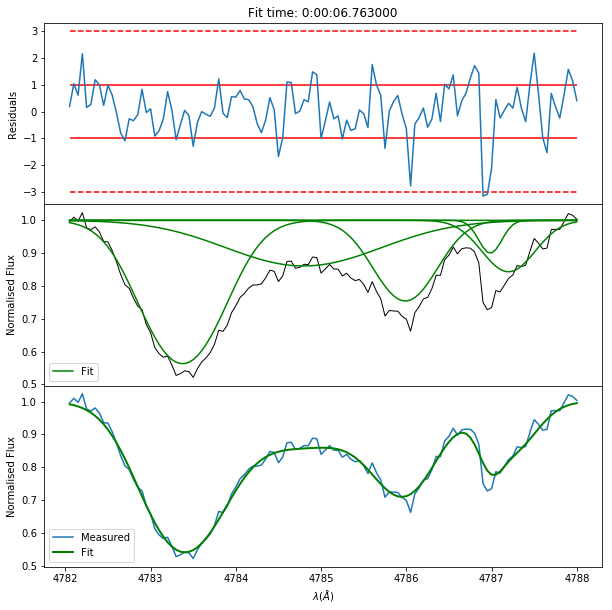

Setting initial number of lines to: 11
n:  12
Fit 1 BIC:  -1324.84375577 , Fit 2 BIC:  -1474.83406761
BIC Ratio:  0.898300212115
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 22.2 sec
Took: 0:00:22.262000  to finish.
n (final):  11
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 21.4 sec
Took: 0:00:21.422000  to finish.


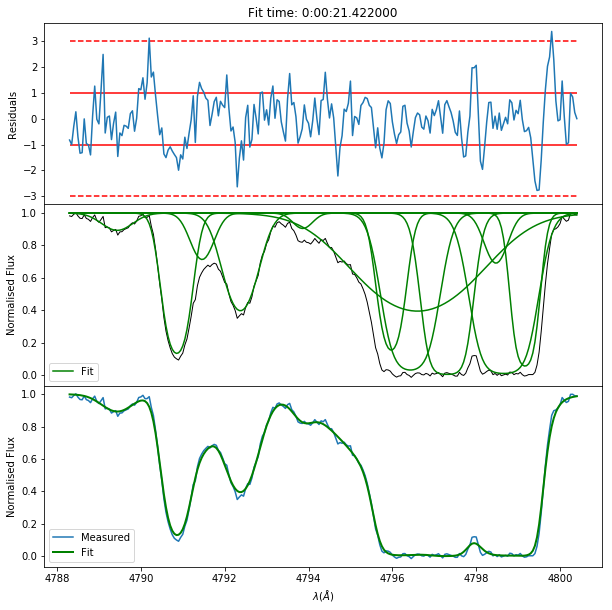

Setting initial number of lines to: 1
n:  2
Fit 1 BIC:  -104.756493295 , Fit 2 BIC:  -177.111293904
BIC Ratio:  0.591472689209
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.2 sec
Took: 0:00:02.181000  to finish.
n (final):  1
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.2 sec
Took: 0:00:02.244000  to finish.


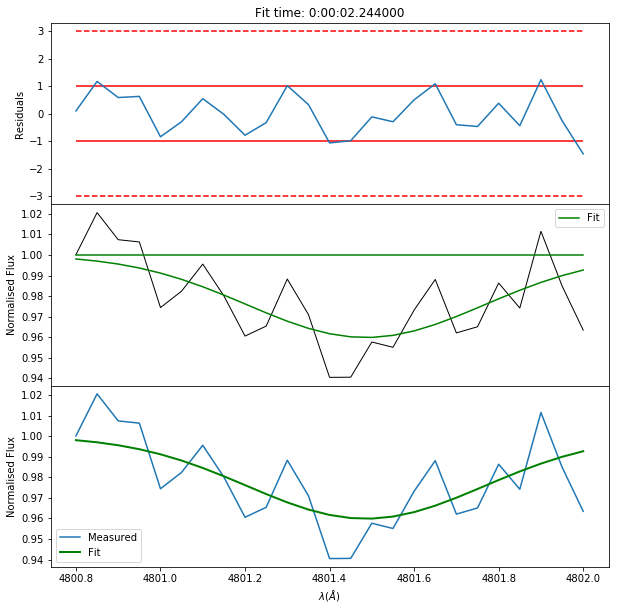

Setting initial number of lines to: 1
n:  2
Fit 1 BIC:  -87.8491304237 , Fit 2 BIC:  -232.470400189
BIC Ratio:  0.3778938323
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.2 sec
Took: 0:00:02.227000  to finish.
n (final):  1
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.4 sec
Took: 0:00:02.383000  to finish.


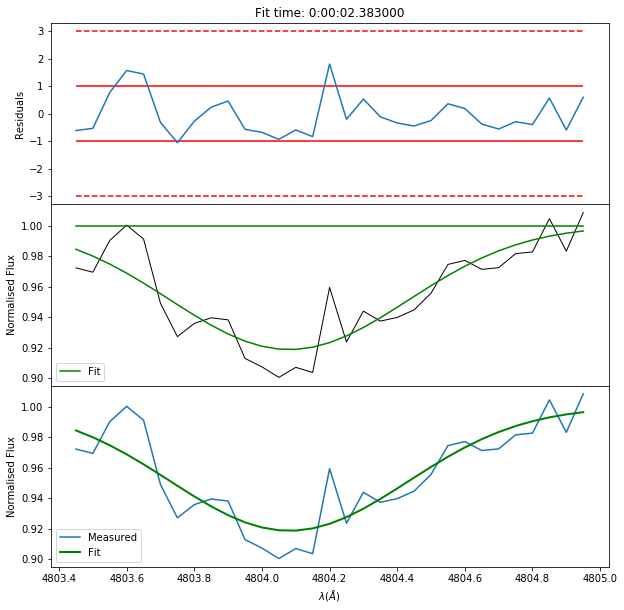

Setting initial number of lines to: 1
n:  2
Fit 1 BIC:  -105.090868133 , Fit 2 BIC:  -179.422802543
BIC Ratio:  0.585716345101
BIC ratio below 0.95, trying real fit...
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.5 sec
Took: 0:00:02.515000  to finish.
n (final):  1
Using Metropolis step method for each parameter.
 [-----------------100%-----------------] 10000 of 10000 complete in 2.6 sec
Took: 0:00:02.578000  to finish.


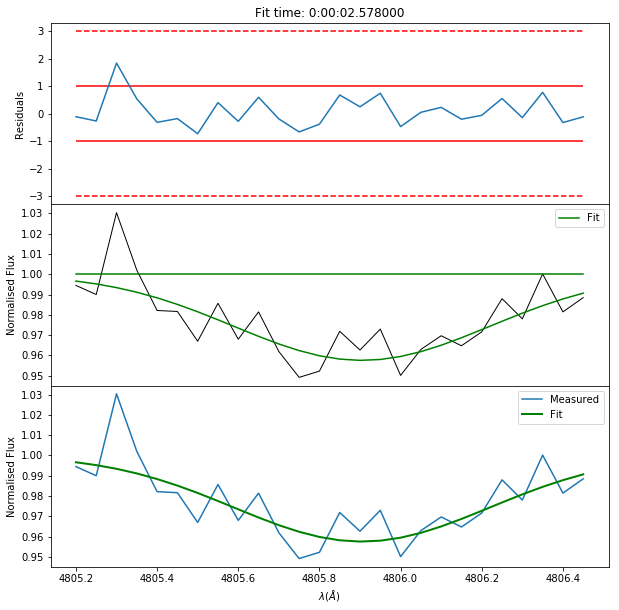

In [13]:
fits = []

for i in range(len(region_arrays[:10])):
    wavelengths = region_arrays[i][0]
    fluxes_orig = region_arrays[i][1]
    fluxes = gaussian_filter(fluxes_orig, 2)

    r = 0
    n = argrelextrema(fluxes, np.less)[0].shape[0]
    if n < 8:
        n = 1
    print "Setting initial number of lines to: {}".format(n)

    vpfit_2 = vpfits.VPfit()
    vpfit_2.initialise_model(wavelengths, fluxes, n)
    vpfit_2.map_estimate()

    first = True
    residual = np.ones(10)
    width = 10

    while sigma_limits(residual/onesigmaerror, width=width) or first:
        first = False
        n += 1
        print "n: ", n

        vpfit_1 = vpfit_2

        vpfit_2 = vpfits.VPfit()
        vpfit_2.initialise_model(wavelengths, fluxes, n)
        vpfit_2.map_estimate()

        print "Fit 1 BIC: ", vpfit_1.MAP.BIC, ", Fit 2 BIC: ", vpfit_2.MAP.BIC
        print "BIC Ratio: ", vpfit_1.MAP.BIC / vpfit_2.MAP.BIC

        r = vpfit_1.MAP.BIC / vpfit_2.MAP.BIC
        residual = fluxes - vpfit_2.total.value

        if r < .95:
            print "BIC ratio below 0.95, trying real fit..."
            vpfit_2.mcmc_fit()

#         f, ax = plt.subplots(2, sharex=True, figsize=(10, 10))
#         ax[0].plot(wavelengths, residual/onesigmaerror)
#         ax[0].hlines(3, wavelengths[0], wavelengths[-1], color='red', linestyles='-')
#         ax[0].hlines(-3, wavelengths[0], wavelengths[-1], color='red', linestyles='-')
#         ax[0].set_title('Residuals')
#         ax[1].plot(wavelengths, fluxes, label='Measured')
#         ax[1].plot(wavelengths, vpfit_2.total.value, label='Fit')
#         ax[1].legend(loc='best')
#         f.subplots_adjust(hspace=0)
#         plt.show()
#         f.clf()
#         plt.close()

        if not sigma_limits(residual/onesigmaerror, width=width):
            print "n (final): ", n - 1
            vpfit_2.mcmc_fit()
            residual = fluxes - vpfit_2.total.value
#             print sigma_limits(residual/onesigmaerror, width=width)
            if sigma_limits(residual/onesigmaerror):
                r = 1
#                 print "here we are"
            else:
                #fits.append(vpfit_1)

                start = region_pixels[i][0]
                end = region_pixels[i][1]

                vpfit_2.plot(wavelengths, fluxes_orig, n=n, start_pix=start, end_pix=end)



